# Deep Learning Verkehrszeichen

Made by [Sharkbyteprojects](https://github.com/sharkbyteprojects)

Need
- Keras
- SKLEARN
- numpy

In [1]:
from keras.layers import Input
import numpy as np
from keras.layers import Dense
inputs=Input(shape=(4,))
fc=Dense(3)(inputs)
from keras.models import Model
model=Model(input=inputs,output=fc)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


Zeige infos über Model:

In [2]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Compile and add new Neurons

In [3]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])
predictionss=Dense(8,activation="softmax")(fc)
predictions=Dense(3,activation="softmax")(predictionss)

Test of Model:

In [4]:
az=model.predict(np.array([[5.1,5.3,1.4,0.2]]))

Recompile and Retry


In [5]:
model=Model(input=inputs,output=predictions)
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])
model.summary()
aza=model.predict(np.array([[5.1,5.3,1.4,0.2]]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


train it


In [6]:
from sklearn import datasets
iris =datasets.load_iris()
X=np.array(iris.data)
y=np.array(iris.target)
X.shape, y.shape
from keras.utils.np_utils import to_categorical
y=to_categorical(y,3)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

complete prepare for train, start train:


In [7]:
model.fit(X_train, y_train,epochs=500,validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 3s 37ms/step - loss: 1.1123 - accuracy: 0.3452 - val_loss: 1.1231 - val_accuracy: 0.3056
Epoch 2/500
84/84 [==============================] - 0s 333us/step - loss: 1.1110 - accuracy: 0.3452 - val_loss: 1.1217 - val_accuracy: 0.3056
Epoch 3/500
84/84 [==============================] - 0s 250us/step - loss: 1.1098 - accuracy: 0.3452 - val_loss: 1.1204 - val_accuracy: 0.3056
Epoch 4/500
84/84 [==============================] - 0s 274us/step - loss: 1.1088 - accuracy: 0.3452 - val_loss: 1.1193 - val_accuracy: 0.3056
Epoch 5/500
84/84 [==============================] - 0s 322us/step - loss: 1.1078 - accuracy: 0.3452 - val_loss: 1.1182 - val_accuracy: 0.3056
Epoch 6/500
84/84 [==============================] - 0s 274us/step - loss: 1.1070 - accuracy: 0.3452 - val_loss: 1.1173 - val_accuracy: 0.3056
Epoch 7/500
84/84 [==============================] - 0s 286us/step - loss: 1.1064 - accuracy: 0.345

Test


In [8]:
print("1. 1 Neuron")
print(az)
print("2. 2 Neuron:")
print(aza)
print("3. Train")
print(model.predict(np.array([[5.1,5.3,1.4,0.2]])))

1. 1 Neuron
[[4.0191116 5.559356  2.1950998]]
2. 2 Neuron:
[[0.3650286  0.27377746 0.361194  ]]
3. Train
[[0.8907314  0.07109444 0.0381741 ]]


using testdata

In [9]:
train_loss, train_accuracy=model.evaluate(X_train, y_train)
round(train_loss*100,1), round(train_accuracy*100,1)

120/120 [==============================] - 0s 158us/step


(54.3, 68.3)

In [10]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
round(test_loss*100,1), round(test_accuracy*100,1)

30/30 [==============================] - 0s 67us/step


(54.3, 66.7)

### HOW TO:
Using This Iris Framework (Data in MM)

In [11]:
print(model.predict(np.array([[5.1,5.3,1.4,0.2]])))#RANGE: SEPAL LENGHT, SEPAL WIDTH,PETAL LENGHT, PETAL WIDTH

[[0.8907314  0.07109444 0.0381741 ]]


---

## Vergleich mit ML

In [12]:
Xy=iris.data
yy=iris.data
Xy_sepal_lenght=Xy[:,0]
Xy_sepal_width=Xy[:,1]
Xy_petal_lenght=Xy[:,2]
Xy_petal_width=Xy[:,3]
from sklearn.model_selection import train_test_split
Xy_train, Xy_test, yy_train, yy_test=train_test_split(X,y,test_size=0.4)
#USING NEAREST NEIGHBORS
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier(1)
clf.fit(Xy_train,yy_train)
print(clf.score(Xy_train,yy_train))
print(clf.score(Xy_test,yy_test))

1.0
0.9166666666666666


## Vergleich

In [13]:
print("Deep Learning:")
deplearn=model.predict(np.array([[6.3,2.7,5.5,1.5]]))
print("Probability for zero in percent")
print(round(deplearn[0][0]*100,1))
print("Probability for one in percent")
print(round(deplearn[0][1]*100,1))
print("Probability for two in percent")
print(round(deplearn[0][2]*100,1))

Deep Learning:
Probability for zero in percent
6.0
Probability for one in percent
45.0
Probability for two in percent
49.1


In [14]:
print("ML:")
clf.predict([[6.3,2.7,5.5,1.5]])

ML:


array([[0., 0., 1.]], dtype=float32)

### distribution of data

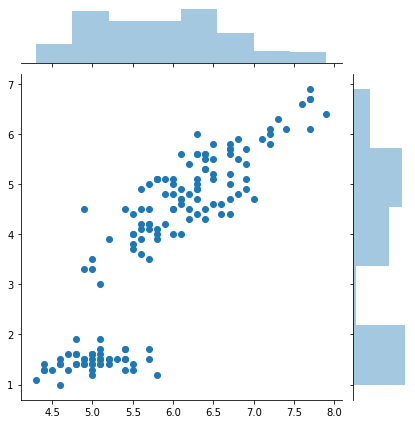

In [17]:
import seaborn as sns
sns.jointplot(Xy_sepal_lenght, Xy_petal_lenght)

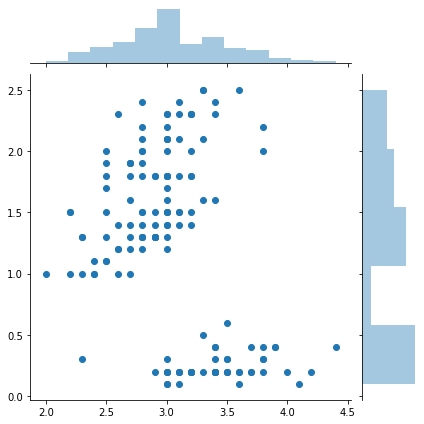

In [16]:
sns.jointplot(Xy_sepal_width, Xy_petal_width)